In [191]:
# All imports
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set_context('poster')
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from itertools import cycle, islice

In [192]:
df = pd.read_csv(r'/Users/student/Documents/GitHub/nyu_arise_noise_2020/data/sonyc_2020-06-20.csv')
# Data from this chart is not from every single day. Otherwise, there would be many more rows

In [193]:
# Making new dataframe based on the original
sensor_df = df[df['public_id'] == 2]
# Set index to date column
sensor_df = sensor_df.set_index('date')

In [194]:
# Convert index to "DateTimeIndex"
sensor_df.index # Check index type
# Convert continued
pd.to_datetime(sensor_df.index)
sensor_df.index = pd.to_datetime(sensor_df.index)

In [195]:
data_days = len(sensor_df) / 24

In [196]:
# Redcue demial place of number
print('Number of days in sensor dataframe:', data_days)
# Shows length of data in days

Number of days in sensor dataframe: 405.7916666666667


In [197]:
# Reduce decimal place of number
data_years = data_days / 365
print('Number of years in sensor dataframe:', data_years)
# Shows length of data in years

Number of years in sensor dataframe: 1.1117579908675799


In [198]:
# Creating columns for date information (year, month, week, day, etc.)
sensor_df['year'] = sensor_df.index.year
sensor_df['month'] = sensor_df.index.month
# Monday = 0, Sunday = 6
sensor_df['day_of_week'] = sensor_df.index.dayofweek
# Adding the name of the day in the week
sensor_df['week_day_string'] = sensor_df.index.day_name().str.slice(start=0, stop=3)

In [199]:
sensor_df

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2017-03-01 00:00:00,40.730329,-73.998697,541.0,2.445,73.600,65.684,67.990,54.510,64.544,97.87,52.26,2,45.61,1.360,4.724,2017,3,2,Wed
2017-03-01 01:00:00,40.730329,-73.998697,541.0,3.230,71.220,64.290,66.380,53.490,62.161,95.78,51.66,2,44.12,1.658,4.458,2017,3,2,Wed
2017-03-01 02:00:00,40.730329,-73.998697,541.0,9.188,71.571,60.840,64.900,52.875,61.284,89.58,50.81,2,38.77,2.677,4.037,2017,3,2,Wed
2017-03-01 03:00:00,40.730329,-73.998697,541.0,8.966,69.911,59.250,64.150,52.070,59.261,83.24,49.94,2,33.30,2.761,3.873,2017,3,2,Wed
2017-03-01 04:00:00,40.730329,-73.998697,541.0,7.773,71.950,60.904,65.012,52.530,60.815,86.41,50.64,2,35.77,2.570,4.212,2017,3,2,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-11 13:00:00,40.730329,-73.998697,541.0,6.003,70.890,63.755,66.130,58.540,62.204,83.80,55.77,2,28.03,1.977,2.529,2020,6,3,Thu
2020-06-11 14:00:00,40.730329,-73.998697,541.0,21.366,68.020,63.180,64.060,59.550,62.116,90.21,56.80,2,33.41,3.130,1.820,2020,6,3,Thu
2020-06-11 15:00:00,40.730329,-73.998697,541.0,4.576,65.980,62.790,63.550,57.450,60.920,87.26,54.66,2,32.60,0.970,2.185,2020,6,3,Thu


This dataframe is taken from the original and uses the date cloumn as the index. Going forward, we are using this dataframe to further downsample our data and isolate our desired information.

In [164]:
# Only return the values from the original sensor_df where the date is 2019
sensor_df_2019 = sensor_df[sensor_df['year'] == 2019]
sensor_df_2019

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2019-03-01 00:00:00,40.730329,-73.998697,541.0,15.105,68.341,58.700,60.320,53.06,59.008,88.91,50.74,2,38.17,2.933,2.971,2019,3,4,Fri
2019-03-01 01:00:00,40.730329,-73.998697,541.0,2.810,66.090,61.940,63.160,52.61,58.563,81.86,50.18,2,31.68,1.409,3.576,2019,3,4,Fri
2019-03-01 02:00:00,40.730329,-73.998697,541.0,10.101,70.279,59.123,61.170,51.91,58.867,86.35,49.79,2,36.56,2.611,3.577,2019,3,4,Fri
2019-03-01 03:00:00,40.730329,-73.998697,541.0,20.106,66.181,56.850,59.050,51.92,57.435,82.80,49.61,2,33.19,3.603,2.856,2019,3,4,Fri
2019-03-01 04:00:00,40.730329,-73.998697,541.0,11.181,65.060,56.680,58.370,51.89,55.421,74.25,49.18,2,25.07,2.706,2.486,2019,3,4,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-19 19:00:00,40.730329,-73.998697,541.0,0.013,73.210,69.040,70.600,59.68,65.960,83.65,55.17,2,28.48,0.354,3.628,2019,6,2,Wed
2019-06-19 20:00:00,40.730329,-73.998697,541.0,6.640,69.790,61.240,64.640,55.27,60.146,84.24,52.39,2,31.85,2.192,3.086,2019,6,2,Wed
2019-06-19 21:00:00,40.730329,-73.998697,541.0,8.252,62.540,58.930,59.883,54.93,57.244,76.38,52.97,2,23.41,1.919,1.776,2019,6,2,Wed


In [337]:
# Filtering data for 1 week
# Start and end dates
start_date = '2019-03-03'
end_date = '2019-03-17'

# Setting the 'mask' function
mask = (sensor_df_2019.index > start_date) & (sensor_df_2019.index < end_date)

In [338]:
#Assigning Mask
# Must create a new dataframe to pull data from other dataframes,
# Such as sensor_df_2019
sensor_df_week = sensor_df_2019.loc[mask]
sensor_df_week

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2019-03-03 01:00:00,40.730329,-73.998697,541.0,18.864,64.693,56.58,57.800,51.550,56.491,84.24,49.02,2,35.22,3.151,2.624,2019,3,6,Sun
2019-03-03 02:00:00,40.730329,-73.998697,541.0,12.842,62.059,56.80,58.030,51.210,55.684,81.13,48.89,2,32.24,2.456,2.624,2019,3,6,Sun
2019-03-03 03:00:00,40.730329,-73.998697,541.0,8.552,62.730,56.56,57.930,50.960,54.813,73.72,48.46,2,25.26,2.211,2.603,2019,3,6,Sun
2019-03-03 04:00:00,40.730329,-73.998697,541.0,6.311,60.250,55.26,56.740,50.670,53.317,72.50,48.41,2,24.09,2.048,2.101,2019,3,6,Sun
2019-03-03 05:00:00,40.730329,-73.998697,541.0,15.569,60.740,54.35,56.370,50.440,53.313,74.82,48.03,2,26.79,3.107,2.145,2019,3,6,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-16 19:00:00,40.730329,-73.998697,541.0,5.798,74.371,63.81,66.793,55.620,62.796,84.27,52.23,2,32.04,2.000,3.849,2019,3,5,Sat
2019-03-16 20:00:00,40.730329,-73.998697,541.0,8.202,71.090,61.15,63.740,54.760,60.272,81.76,51.86,2,29.90,2.325,3.222,2019,3,5,Sat
2019-03-16 21:00:00,40.730329,-73.998697,541.0,10.010,70.860,60.12,63.092,53.715,60.011,85.26,51.19,2,34.07,2.608,3.374,2019,3,5,Sat


This dataframe is downsampled to show the the recorded decibel levels between March 3rd 2019 and March 10th 2019. This includes the hours for each recorded day.

In [339]:
# Creating new dataframe called "daily_summary" 
daily_summary = pd.DataFrame()
# Resampling hourly sensor dataframe to mean daily decibel levels
daily_summary = sensor_df_2019.resample('D').mean()
# Downsampled from decibel levels per hour to decibel levels to day
daily_summary

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-01,40.730329,-73.998697,541.0,9.705083,70.371958,61.037542,63.546958,54.306083,60.520250,84.330833,51.526250,2,32.804583,2.418625,3.328917,2019,3,4
2019-03-02,40.730329,-73.998697,541.0,6.468875,68.075083,60.128708,62.744250,52.475000,58.871625,81.837083,49.617083,2,32.220000,1.924375,3.482875,2019,3,5
2019-03-03,40.730329,-73.998697,541.0,5.315208,68.799708,61.318500,63.741750,53.324208,59.423917,80.908750,50.652917,2,30.255833,1.768417,3.530125,2019,3,6
2019-03-04,40.730329,-73.998697,541.0,5.936042,68.959083,60.803750,63.132583,53.627917,59.247667,81.801667,50.812917,2,30.988750,1.927208,3.318208,2019,3,0
2019-03-05,40.730329,-73.998697,541.0,6.158875,67.502250,60.068333,62.557542,52.512917,58.311875,81.182500,49.477500,2,31.705000,1.949083,3.392292,2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-15,40.730329,-73.998697,541.0,7.306750,70.569833,62.789917,65.048917,56.089792,61.468333,84.271250,53.181250,2,31.090000,2.010292,3.125125,2019,6,5
2019-06-16,40.730329,-73.998697,541.0,7.982458,68.300917,61.088750,63.100917,55.186250,59.614125,81.717083,52.690833,2,29.026250,2.121500,2.802667,2019,6,6
2019-06-17,40.730329,-73.998697,541.0,8.199792,70.302167,63.056833,65.154583,56.529583,61.532583,84.953333,53.695000,2,31.258333,2.063500,3.003708,2019,6,0


Using the sensor_df_week dataframe, we get the average decibel level of each day.

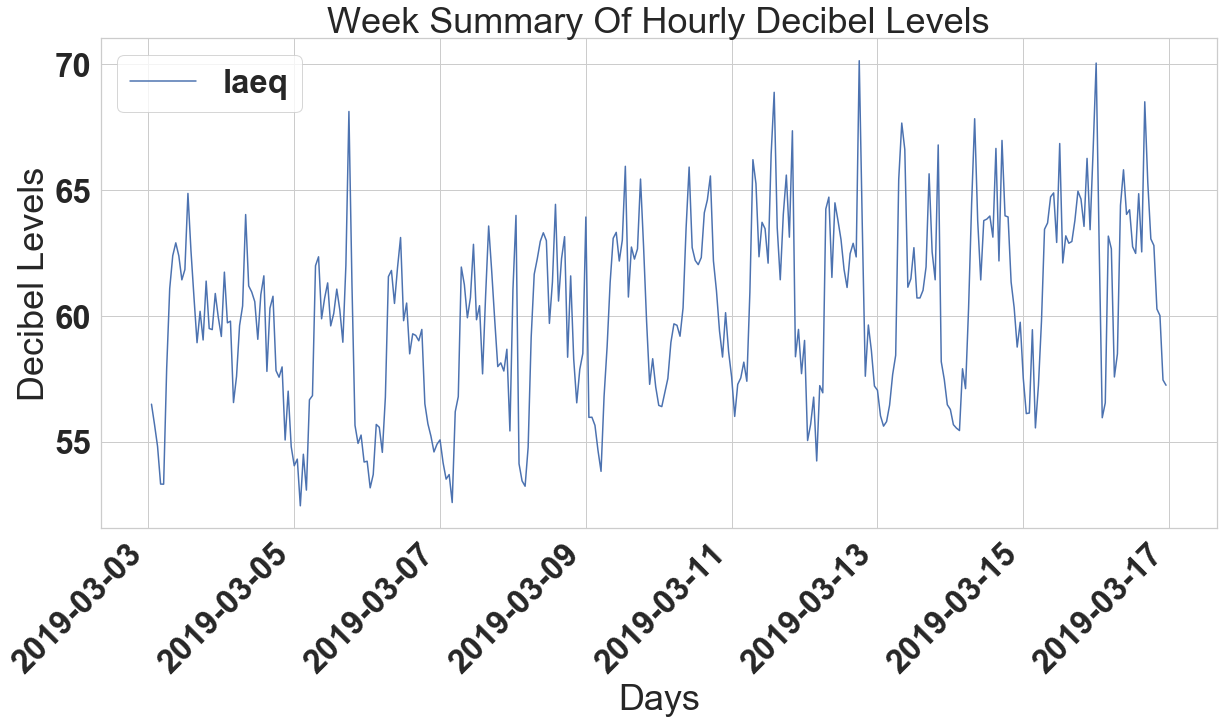

In [340]:
# Making hourly plot
ax = sensor_df_week.plot(y='laeq', title='Week Summary Of Hourly Decibel Levels', figsize=(20,10), grid=True, rot=45)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
xtick = pd.date_range(start=sensor_df_week.index.min().date(), end=sensor_df_week.index.max().date(), freq='D')

This plot is displaying the decibel levels of each hour of the 8 days from the downsampled week. This totals to 168 points on the plot.

In [341]:
# Downsampling to make plot by day
# Creating new dataframe called "week_daily" for weekly plot,
# downsampled to days
week_daily = pd.DataFrame()
# Resample hourly dataframe to mean daily decibel levels (From the filtered week)
week_daily = sensor_df_week.resample('D').mean()
week_daily

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-03,40.730329,-73.998697,541.0,5.291217,69.132739,61.507565,63.987478,53.375696,59.610087,81.140870,50.712174,2,30.428696,1.776609,3.591609,2019,3,6
2019-03-04,40.730329,-73.998697,541.0,5.936042,68.959083,60.803750,63.132583,53.627917,59.247667,81.801667,50.812917,2,30.988750,1.927208,3.318208,2019,3,0
2019-03-05,40.730329,-73.998697,541.0,6.158875,67.502250,60.068333,62.557542,52.512917,58.311875,81.182500,49.477500,2,31.705000,1.949083,3.392292,2019,3,1
2019-03-06,40.730329,-73.998697,541.0,7.720708,67.220125,59.116417,61.557792,52.157083,57.721042,80.291250,49.137500,2,31.153750,2.145333,3.254667,2019,3,2
2019-03-07,40.730329,-73.998697,541.0,7.860625,68.575250,59.569875,62.255667,52.274000,58.360375,81.909583,49.385000,2,32.524583,2.242042,3.465708,2019,3,3
2019-03-08,40.730329,-73.998697,541.0,4.971083,69.415667,61.862625,64.205625,53.458125,59.815875,81.316667,50.317500,2,30.999167,1.704083,3.685625,2019,3,4
2019-03-09,40.730329,-73.998697,541.0,6.361292,69.943375,61.706167,64.251750,54.030000,60.147833,82.245833,51.073333,2,31.172500,1.980458,3.502833,2019,3,5
2019-03-10,40.730329,-73.998697,541.0,6.507870,69.390652,62.279348,64.213870,56.202174,60.898957,83.965217,53.583913,2,30.381304,1.842870,2.844957,2019,3,6
2019-03-11,40.730329,-73.998697,541.0,7.273333,71.520125,62.874292,65.657333,54.945000,61.826500,84.890417,52.090417,2,32.800000,2.148417,3.649042,2019,3,0


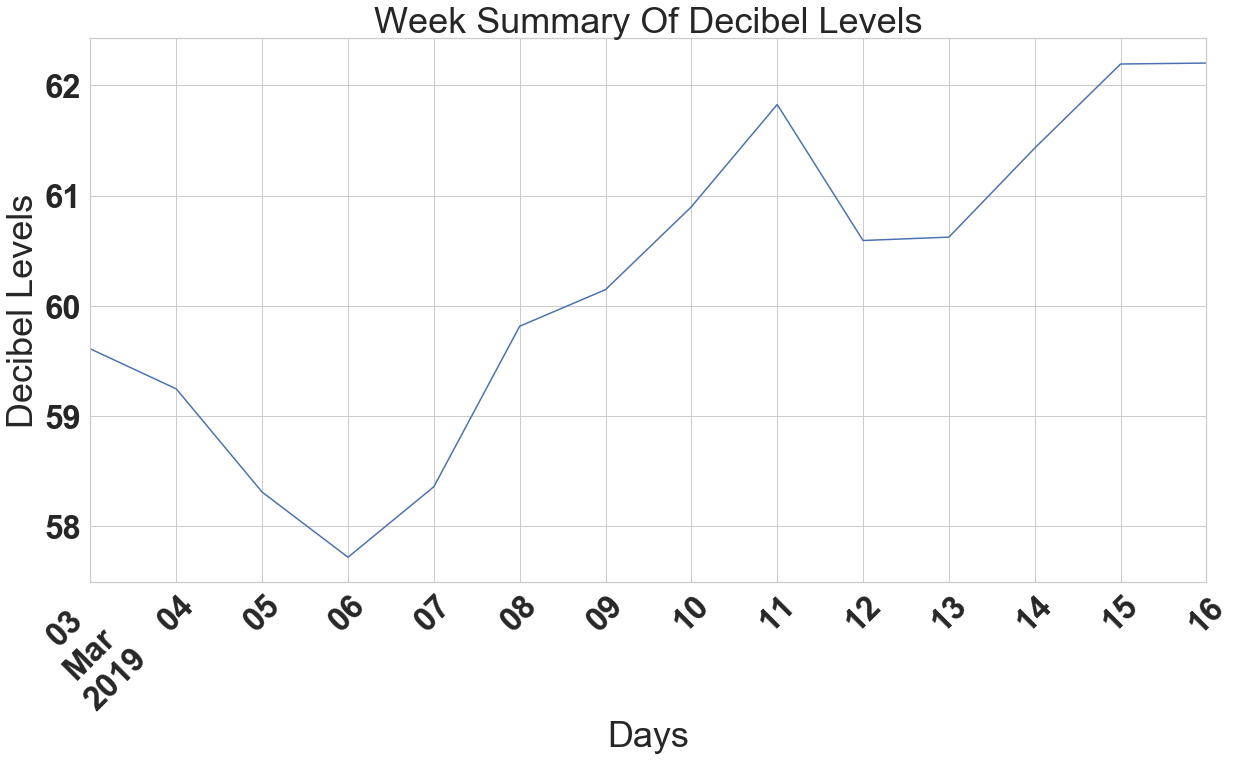

In [342]:
# Labeled plot with ax
# 'figsize' makes it bigger!
# 'xtick' and 'ax.grid' for grid!
ax = week_daily.plot(y='laeq', title='Week Summary Of Decibel Levels', figsize=(20,10), grid=True, 
                      rot=45, legend=False)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
xtick = pd.date_range(start=week_daily.index.min().date(), end=week_daily.index.max().date(), freq='D')
ax.set_xticks(xtick, minor=True )
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')

font = {'family' : 'sans-serif',
       'weight' : 'bold',
       'size'   : 22}

matplotlib.rc('font', **font)

# Display the day of the week
# Convert to bar plot

[Text(0, 0, '2019-03-03-Sun'),
 Text(0, 0, '2019-03-04-Mon'),
 Text(0, 0, '2019-03-05-Tue'),
 Text(0, 0, '2019-03-06-Wed'),
 Text(0, 0, '2019-03-07-Thu'),
 Text(0, 0, '2019-03-08-Fri'),
 Text(0, 0, '2019-03-09-Sat'),
 Text(0, 0, '2019-03-10-Sun'),
 Text(0, 0, '2019-03-11-Mon'),
 Text(0, 0, '2019-03-12-Tue'),
 Text(0, 0, '2019-03-13-Wed'),
 Text(0, 0, '2019-03-14-Thu'),
 Text(0, 0, '2019-03-15-Fri'),
 Text(0, 0, '2019-03-16-Sat')]

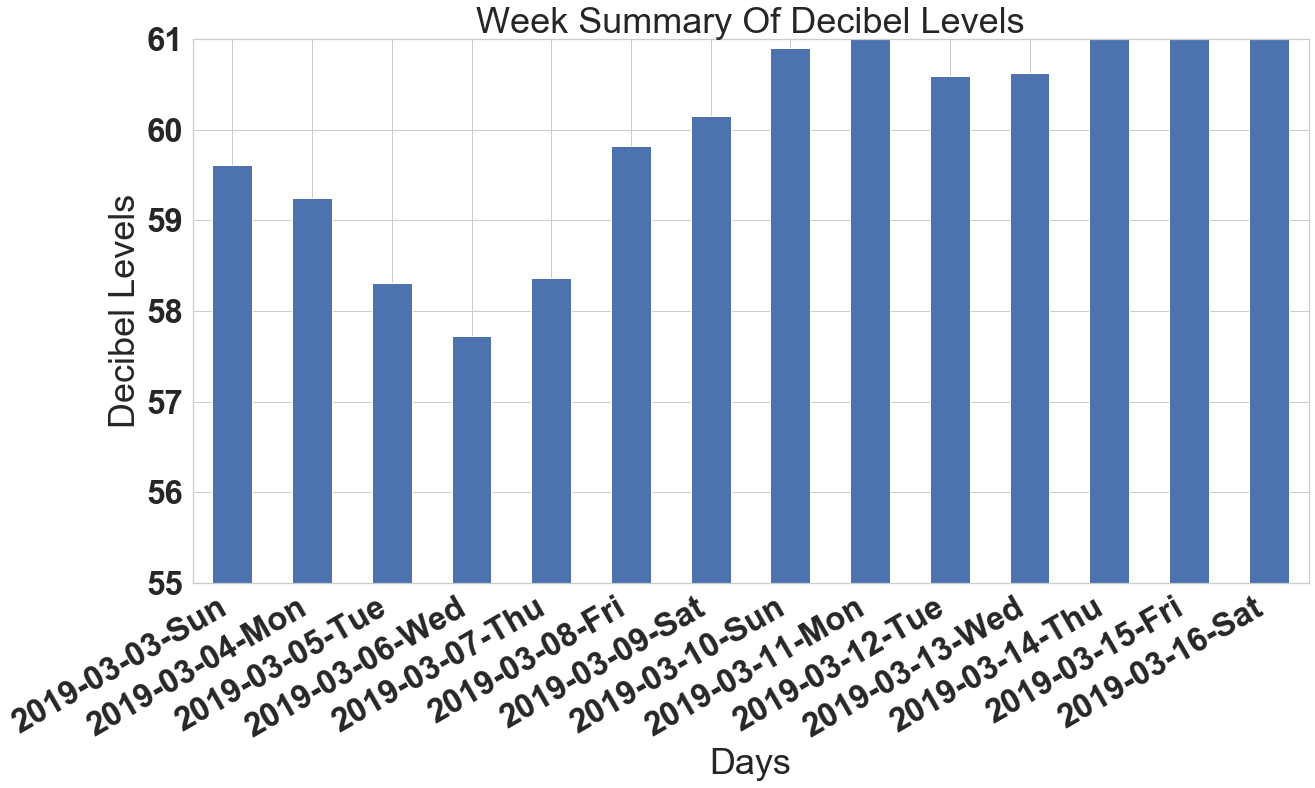

In [343]:
# Bar plot version
ax = week_daily.plot.bar(y='laeq', title='Week Summary Of Decibel Levels', figsize=(20,10), rot=45, legend=False)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.set_ylim(55,61)
x_dates = week_daily.index.strftime('%Y-%m-%d-%a')
ax.set_xticklabels(labels=x_dates, rotation=30, ha='right')

# Display day of week
# Include the min and max columns from dataframe 

In [344]:
week_daily.tail()

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-12,40.730329,-73.998697,541.0,6.622208,70.696667,61.933292,64.748500,54.628000,60.593250,82.178750,51.576667,2,30.602083,2.088042,3.450542,2019,3,1
2019-03-13,40.730329,-73.998697,541.0,6.415417,70.224875,61.919750,64.703500,54.524583,60.623958,82.919167,51.468750,2,31.450417,2.022625,3.423417,2019,3,2
2019-03-14,40.730329,-73.998697,541.0,8.805958,70.839667,62.754542,65.335667,55.860208,61.431500,83.357083,52.962917,2,30.394167,2.251500,3.262583,2019,3,3
2019-03-15,40.730329,-73.998697,541.0,7.361208,71.211708,63.844500,66.072958,57.182500,62.193833,84.090417,54.231250,2,29.859167,2.063417,3.062250,2019,3,4
2019-03-16,40.730329,-73.998697,541.0,7.236792,71.703250,63.261625,65.979583,55.352083,62.202292,84.970417,52.028333,2,32.942083,2.027667,3.623917,2019,3,5


# Week Day Analysis

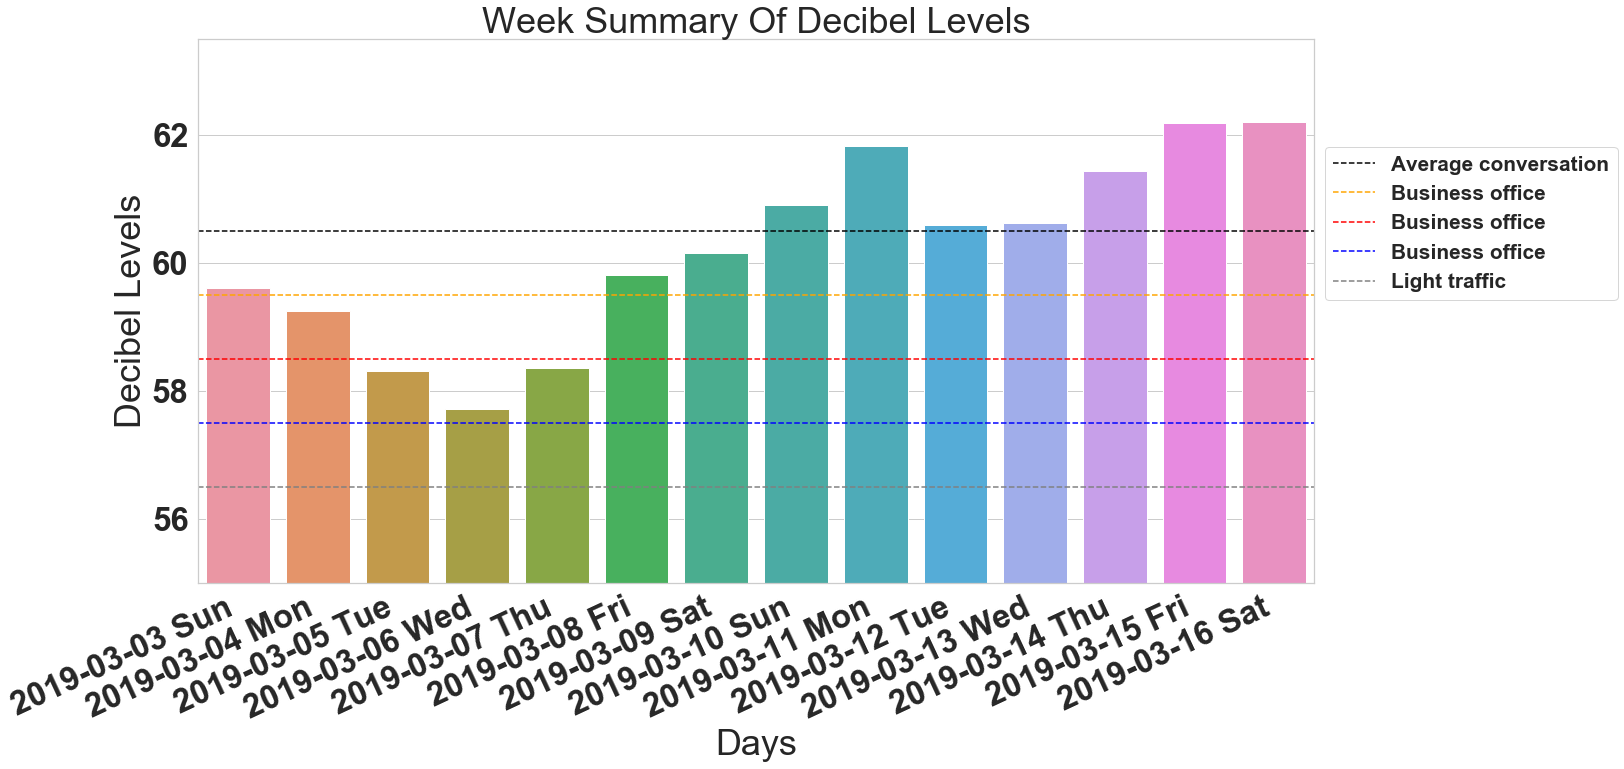

In [412]:
# Bar plot with seaborn

plt.figure(figsize=(20, 10))
plt.title('Week Summary Of Decibel Levels')
plt.axhline(y=60.5, color='black', linestyle='--', label ='Average conversation')
plt.axhline(y=59.5, color='orange', linestyle='--', label ='Business office')
plt.axhline(y=58.5, color='red', linestyle='--', label ='Business office')
plt.axhline(y=57.5, color='blue', linestyle='--', label ='Business office')
plt.axhline(y=56.5, color='gray', linestyle='--', label ='Light traffic')
sns.set(style="whitegrid", font_scale=3)
ax = sns.barplot(x=week_daily.index, y='laeq', data=week_daily)
ax.set_xlabel("Days")
ax.set_ylabel("Decibel Levels")
ax.set_ylim(55,63.5)
x_dates = week_daily.index.strftime('%Y-%m-%d %a')
ax.set_xticklabels(labels=x_dates, rotation=25, ha='right')
leg = plt.legend(loc ='lower left', fontsize='xx-small', bbox_to_anchor=(1.0, 0.5))
leg.set_zorder(2.5)

# Look into groupby (pandas tutorial)
# Add the min and max

 We've created a barplot that displays the average decibel levels for each of the days in the range. As you can see, a few of the highest levels occur on weekend days or days closest to the weekend. This suggests that people may be more active during the weekend, since they get time off from work.

In [346]:
# Setting up dataframe for a plot with 24 points (24 Hours in 1 day)
day_hour = pd.DataFrame()
day_hour = sensor_df_week.resample('H').mean()
day_hour

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
2019-03-03 01:00:00,40.730329,-73.998697,541.0,18.864,64.693,56.58,57.800,51.550,56.491,84.24,49.02,2.0,35.22,3.151,2.624,2019.0,3.0,6.0
2019-03-03 02:00:00,40.730329,-73.998697,541.0,12.842,62.059,56.80,58.030,51.210,55.684,81.13,48.89,2.0,32.24,2.456,2.624,2019.0,3.0,6.0
2019-03-03 03:00:00,40.730329,-73.998697,541.0,8.552,62.730,56.56,57.930,50.960,54.813,73.72,48.46,2.0,25.26,2.211,2.603,2019.0,3.0,6.0
2019-03-03 04:00:00,40.730329,-73.998697,541.0,6.311,60.250,55.26,56.740,50.670,53.317,72.50,48.41,2.0,24.09,2.048,2.101,2019.0,3.0,6.0
2019-03-03 05:00:00,40.730329,-73.998697,541.0,15.569,60.740,54.35,56.370,50.440,53.313,74.82,48.03,2.0,26.79,3.107,2.145,2019.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-16 19:00:00,40.730329,-73.998697,541.0,5.798,74.371,63.81,66.793,55.620,62.796,84.27,52.23,2.0,32.04,2.000,3.849,2019.0,3.0,5.0
2019-03-16 20:00:00,40.730329,-73.998697,541.0,8.202,71.090,61.15,63.740,54.760,60.272,81.76,51.86,2.0,29.90,2.325,3.222,2019.0,3.0,5.0
2019-03-16 21:00:00,40.730329,-73.998697,541.0,10.010,70.860,60.12,63.092,53.715,60.011,85.26,51.19,2.0,34.07,2.608,3.374,2019.0,3.0,5.0


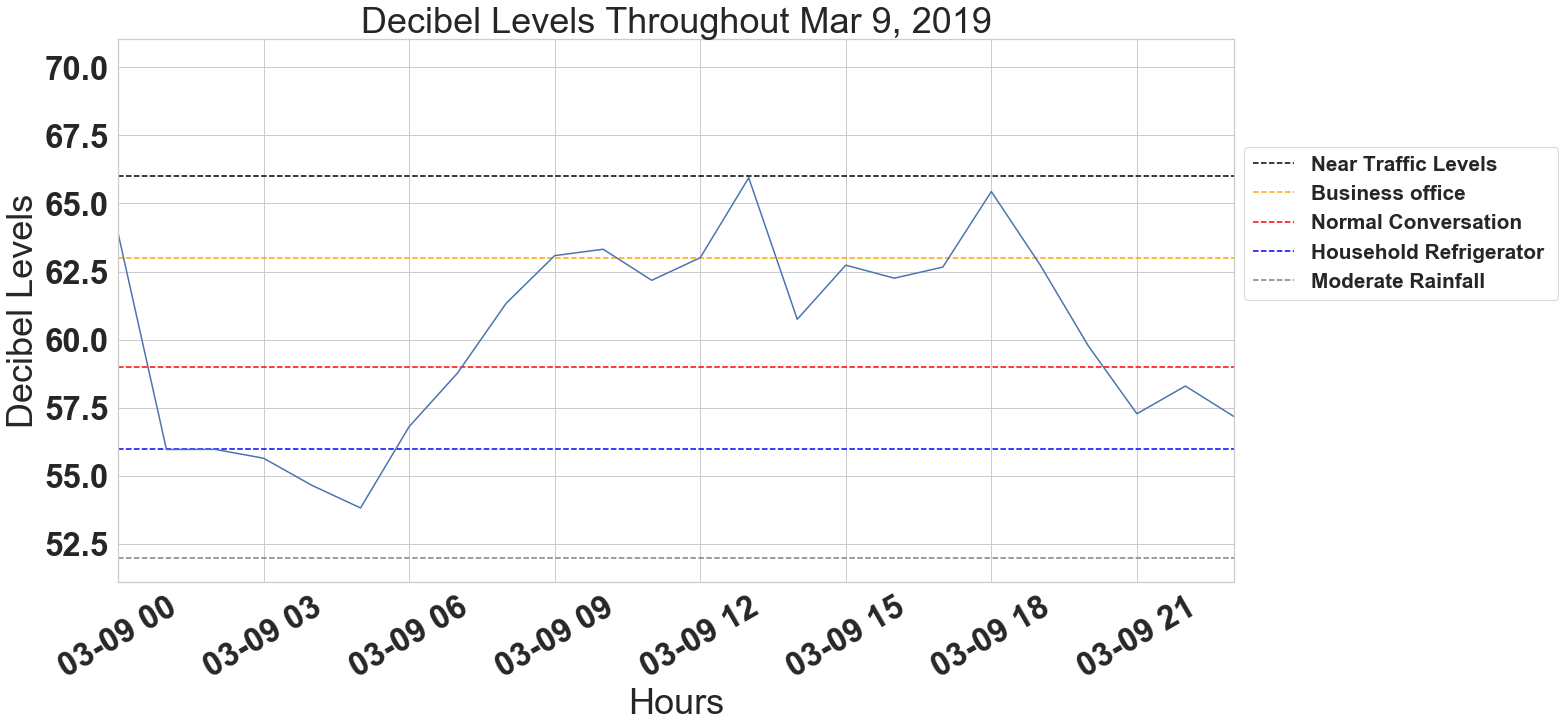

In [411]:
plt.figure(figsize=(20, 10))
plt.title('Decibel Levels Throughout Mar 9, 2019')
plt.axhline(y=66, color='black', linestyle='--', label ='Near Traffic Levels')
plt.axhline(y=63, color='orange', linestyle='--', label ='Business office')
plt.axhline(y=59, color='red', linestyle='--', label ='Normal Conversation')
plt.axhline(y=56, color='blue', linestyle='--', label ='Household Refrigerator ')
plt.axhline(y=52, color='gray', linestyle='--', label ='Moderate Rainfall')
plt.xticks(rotation=30)
ax = sns.lineplot(x=day_hour.index, y='laeq', data=day_hour)
ax.set_xlabel("Hours")
ax.set_ylabel("Decibel Levels")
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
ax.set_xlim(pd.Timestamp('2019-3-09 00:00:00'), pd.Timestamp('2019-3-09 23:00:00'))
xtick = pd.date_range(start=day_hour.index.min().date(), end=day_hour.index.max().date(), freq='H')
leg = plt.legend(loc ='lower left', fontsize='xx-small', bbox_to_anchor=(1.0, 0.5))
leg.set_zorder(2.5)

 This plot shows the decibel levels of each hour of March 9th 2019. As this is a day during the weekend (Saturday), it's not to odd to see high decibel levels at midnight since people get time off and can do what they please. We can see in the afternoon and evening decibel levels are high since thats when people are the most active.

In [364]:
# Create plot from the 2 weeks of data using groupby to show
# the average decibel levels per hour across the 2 week data set
# Point for every hour of the day (Average of 11:00 am from everyday)

sensor_df_week.groupby(sensor_df_week.index.hour).mean()

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week
date,,,,,,,,,,,,,,,,,,
0,40.730329,-73.998697,541.0,8.952385,66.288154,59.787231,61.288769,53.571231,58.571000,82.090769,50.404615,2.0,31.686154,2.034615,2.852462,2019.0,3.0,2.769231
1,40.730329,-73.998697,541.0,8.540214,64.947857,58.600714,60.253143,52.201786,56.987714,79.155714,49.649286,2.0,29.506429,2.062071,2.880643,2019.0,3.0,3.000000
2,40.730329,-73.998697,541.0,11.493615,63.254846,56.832308,58.552615,51.556923,55.491462,77.191538,48.966923,2.0,28.224615,2.485231,2.562385,2019.0,3.0,2.769231
3,40.730329,-73.998697,541.0,11.152357,65.205143,57.287500,59.196357,51.645000,56.188571,78.767143,49.083571,2.0,29.683571,2.611357,2.806071,2019.0,3.0,3.000000
4,40.730329,-73.998697,541.0,11.372429,63.508500,56.677071,58.518500,51.484000,55.957714,79.056429,48.937143,2.0,30.119286,2.488571,2.573143,2019.0,3.0,3.000000
5,40.730329,-73.998697,541.0,10.076500,65.484714,57.642786,59.750357,52.098571,56.853143,80.215000,49.447857,2.0,30.767143,2.452357,2.774214,2019.0,3.0,3.000000
6,40.730329,-73.998697,541.0,4.734429,67.997857,60.372429,62.545143,53.161071,58.391429,79.480000,50.135000,2.0,29.345000,1.741857,3.243714,2019.0,3.0,3.000000
7,40.730329,-73.998697,541.0,4.652429,72.899643,63.689214,67.195643,54.725000,62.059929,85.742143,51.772143,2.0,33.970000,1.851071,4.053929,2019.0,3.0,3.000000
8,40.730329,-73.998697,541.0,3.328286,74.668929,65.497500,69.343929,55.175000,63.518500,86.767857,51.800714,2.0,34.967143,1.737857,4.498786,2019.0,3.0,3.000000


In [416]:
sensor_df_week

,block_lat,block_lng,block_num,kurtosis,l1,l10,l5,l90,laeq,max,min,public_id,range,skew,std,year,month,day_of_week,week_day_string
date,,,,,,,,,,,,,,,,,,,
2019-03-03 01:00:00,40.730329,-73.998697,541.0,18.864,64.693,56.58,57.800,51.550,56.491,84.24,49.02,2,35.22,3.151,2.624,2019,3,6,Sun
2019-03-03 02:00:00,40.730329,-73.998697,541.0,12.842,62.059,56.80,58.030,51.210,55.684,81.13,48.89,2,32.24,2.456,2.624,2019,3,6,Sun
2019-03-03 03:00:00,40.730329,-73.998697,541.0,8.552,62.730,56.56,57.930,50.960,54.813,73.72,48.46,2,25.26,2.211,2.603,2019,3,6,Sun
2019-03-03 04:00:00,40.730329,-73.998697,541.0,6.311,60.250,55.26,56.740,50.670,53.317,72.50,48.41,2,24.09,2.048,2.101,2019,3,6,Sun
2019-03-03 05:00:00,40.730329,-73.998697,541.0,15.569,60.740,54.35,56.370,50.440,53.313,74.82,48.03,2,26.79,3.107,2.145,2019,3,6,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-16 19:00:00,40.730329,-73.998697,541.0,5.798,74.371,63.81,66.793,55.620,62.796,84.27,52.23,2,32.04,2.000,3.849,2019,3,5,Sat
2019-03-16 20:00:00,40.730329,-73.998697,541.0,8.202,71.090,61.15,63.740,54.760,60.272,81.76,51.86,2,29.90,2.325,3.222,2019,3,5,Sat
2019-03-16 21:00:00,40.730329,-73.998697,541.0,10.010,70.860,60.12,63.092,53.715,60.011,85.26,51.19,2,34.07,2.608,3.374,2019,3,5,Sat


# Average Decibel Levels By The Hour: Weekdays And Weekends

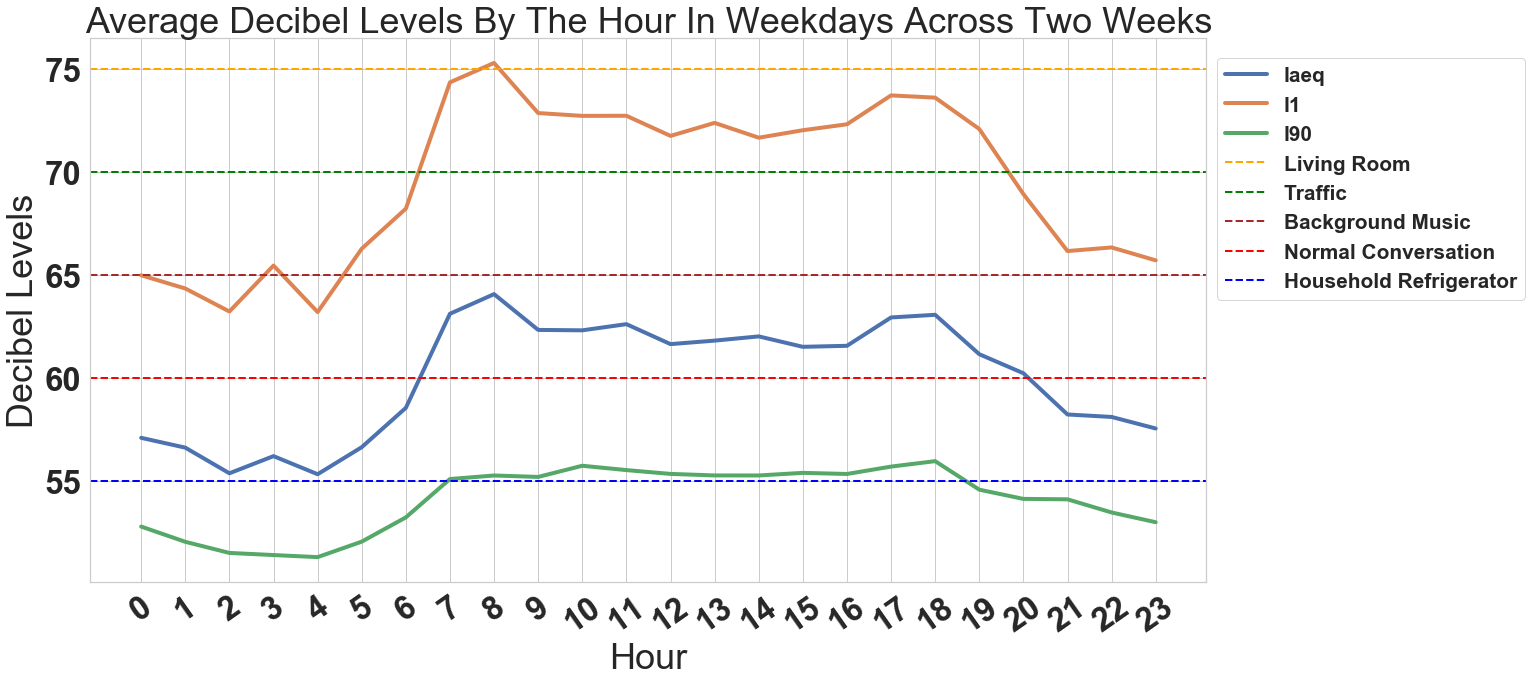

In [441]:
# New line plot that includes: Laeq, L90, and L1
# Laeq = Average decibel level over a period of time
# LX = Statistical decibel level exceeded for 'x' percentage of the time
# L1 = Decibel level of 1% of the time (Peak decibel levels)
# L90 = Ambivient level

sensor_df_weekday = sensor_df_week[sensor_df_week['day_of_week'] < 5]
# Includes 0-4 or Monday to Friday (Only weekdays)

ax = sensor_df_weekday.groupby(sensor_df_weekday.index.hour).mean().plot(y=['laeq', 'l1', 'l90'], 
                      title='Average Decibel Levels By The Hour In Weekdays Across Two Weeks', figsize=(20,10), 
                      grid=True, rot=35, lw=4)
ax.set_xlabel("Hour")
ax.set_ylabel("Decibel Levels")
ax.set_xticks(list(range(0,24)))
plt.axhline(y=75, color='orange', linestyle='--', label ='Living Room', lw=2)
plt.axhline(y=70, color='green', linestyle='--', label ='Traffic', lw=2)
plt.axhline(y=65, color='brown', linestyle='--', label ='Background Music', lw=2)
plt.axhline(y=60, color='red', linestyle='--', label ='Normal Conversation', lw=2)
plt.axhline(y=55, color='blue', linestyle='--', label ='Household Refrigerator', lw=2)
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
leg = plt.legend(loc ='lower left', fontsize='xx-small', bbox_to_anchor=(1.0, 0.5))
leg.set_zorder(2.5)

This plot takes the average decibel level across all 24 hours in a day, taken from the all weekdays in a 2 week range of March 3rd 2019 to March 16 2019. Included is the "L1" and "L90" columns from the dataframe. L1 represents the recorded decibel levels for 1% of the time, or peak levels. L90 is more background noise. And of course, Laeq is the average decibel level. As expected, decibel levels are lowest between 12:00 am and 4:00 am. You can see a steady increase starting at 5:00 am, which is when some people begin to wake up and prepare for the day on weekdays. All three of these lines have a peak around 8:00 am, indicating when people are traveling and heading to their designated location (work, school, etc.). After 8:00 am, decibel levels drop a little, showing at that time people have arrived at their location. Although people may not be traveling as much as in the morning, they're still active. Later, starting at 6:00, we see the decibel levels begin to drop, indicating that people are beginning to settle down and prepare for bed.

In [ ]:
# Separate plots for weekdays and weekends
# Each plot needs it's own groupby process
# Filter, then groupby

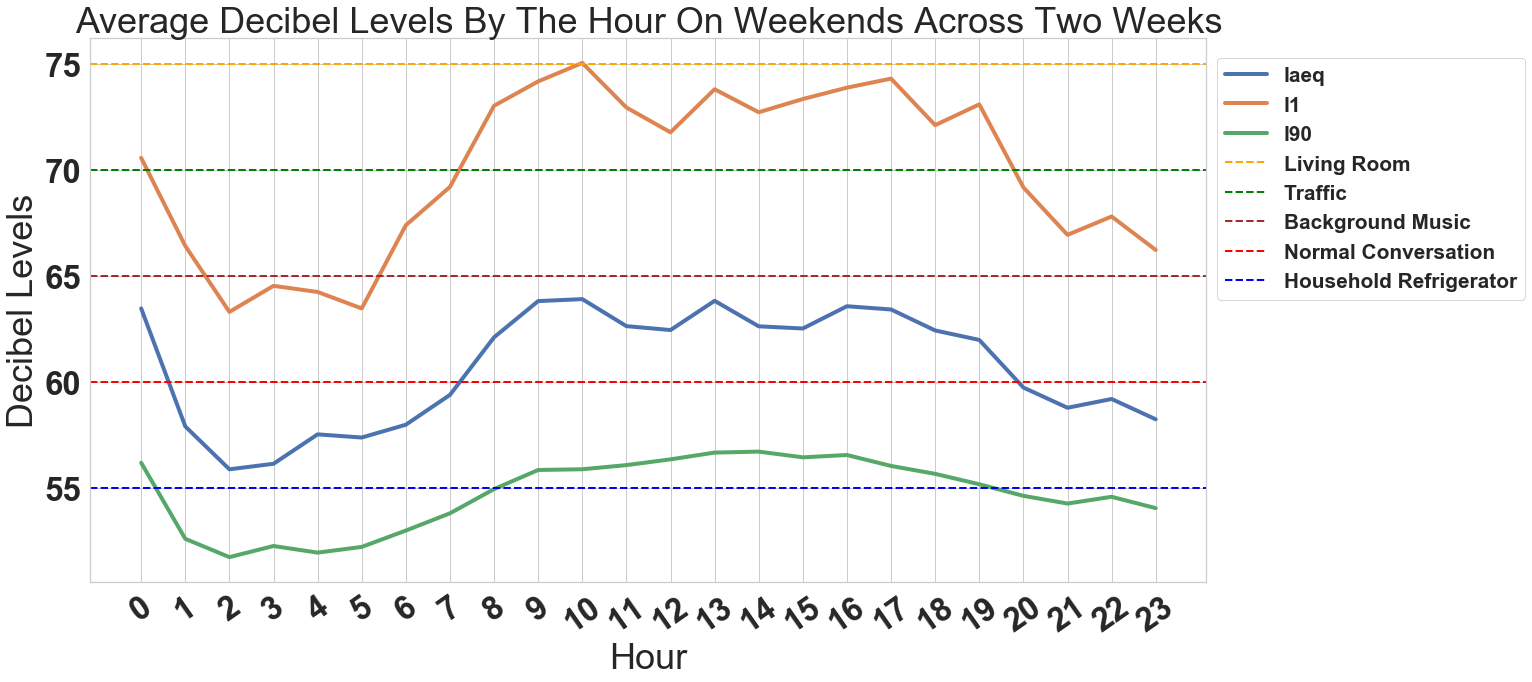

In [439]:
sensor_df_weekend = sensor_df_week[sensor_df_week['day_of_week'] >= 5]
# Includes 5 and 6 or The weekend

ax = sensor_df_weekend.groupby(sensor_df_weekend.index.hour).mean().plot(y=['laeq', 'l1', 'l90'], 
                      title='Average Decibel Levels By The Hour On Weekends Across Two Weeks', figsize=(20,10), 
                      grid=True, rot=35, lw=4)
ax.set_xlabel("Hour")
ax.set_ylabel("Decibel Levels")
ax.set_xticks(list(range(0,24)))
plt.axhline(y=75, color='orange', linestyle='--', label ='Living Room', lw=2)
plt.axhline(y=70, color='green', linestyle='--', label ='Traffic', lw=2)
plt.axhline(y=65, color='brown', linestyle='--', label ='Background Music', lw=2)
plt.axhline(y=60, color='red', linestyle='--', label ='Normal Conversation', lw=2)
plt.axhline(y=55, color='blue', linestyle='--', label ='Household Refrigerator', lw=2)
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')
leg = plt.legend(loc ='lower left', fontsize='xx-small', bbox_to_anchor=(1.0, 0.5))
leg.set_zorder(2.5)

This plot takes the average decibel level across all 24 hours in a day, taken from the all weekends in a 2 week range of March 3rd 2019 to March 16 2019. Included is the "L1" and "L90" columns from the dataframe. L1 represents the recorded decibel levels for 1% of the time, or peak levels. L90 is more background noise. And of course, Laeq is the average decibel level. We see that decibel levels are already high at 12:00 am. Although the data from Friday night isn't shown on this plot, it continues from there into Saturday morning. People tend to go out on Friday nights, as the it is the weekend, which people have time off. From 12:00 am to 2:00 am, we see a significant drop in decibel levels, meaning the late night activities are coming to an end and everyone is finally heading home. Decibel levels begin to increase at 5:00 am, and continue to do so until 10:00 am, a time where deciebel levels peak. This is showing when people start to wake up again, and activity starts. From then on until 5:00 pm, decibel levels stay within the same range. Starting at 5:00 pm, decibel levels drop as people begin to relax. This is probably evident of Sunday when people begin to prepare for Monday morning when they go to work.